In [1]:
# Import required libraries
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue_df = pd.read_csv('merged_data.csv')
dengue_df.shape

(1456, 25)

In [3]:
dengue_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [4]:
# check for missing values in the merged dataset
dengue_df.isnull().sum().sum()

0

#### Make an 80-20 stratified split based on the target data

In [5]:
X = dengue_df.drop(['week_start_date','total_cases'],axis = 1)
y = dengue_df['total_cases']
#Split data into train and test datasets
#X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.20, random_state=42)

<b>Error in stratified splitting</b>
<br>
- The initial startified split will have an error becasue of the of the nature of stratification. The target variable 'total_cases' has few entries in the dataframe that appear only once. So we update the dataset to contain only total cases which appear more than once.

In [6]:
# Eliminating entries
dengue_df =  dengue_df.groupby('total_cases').filter(lambda t: len(t) > 1)
print(dengue_df.shape)

(1409, 25)


In [7]:
X = dengue_df.drop(['week_start_date','total_cases'],axis = 1)
y = dengue_df['total_cases']
# strafied split with no error
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.20, random_state=42)

## Preprocessing
</br>


####  Encode the categorical features and Standardize the numerical features

In [8]:
#Convert city and year as category
X_train['city'] = X_train['city'].astype('category')
X_train['year'] = X_train['year'].astype('category')
X_test['city'] = X_test['city'].astype('category')
X_test['year'] = X_test['year'].astype('category')

In [9]:
# encoding the values of the city and year
X_dummies_tr = pd.get_dummies(X_train[['city','year']])
#X_dummies_tr = np.array(X_dummies_tr)
X_dummies_test = pd.get_dummies(X_test[['city','year']])
#X_dummies_test = np.array(X_dummies_test)

In [10]:
X_dummies_tr.columns

Index(['city_iq', 'city_sj', 'year_1990', 'year_1991', 'year_1992',
       'year_1993', 'year_1994', 'year_1995', 'year_1996', 'year_1997',
       'year_1998', 'year_1999', 'year_2000', 'year_2001', 'year_2002',
       'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007',
       'year_2008', 'year_2009', 'year_2010'],
      dtype='object')

In [11]:
X_dummies_tr.head()

,city_iq,city_sj,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,...,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010
718,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
80,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1232,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1084,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1119,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [12]:
# standardizing Numerical data
scaler = preprocessing.StandardScaler()
# training data - avoid categorical columns
st_numeric_data = scaler.fit_transform(X_train.drop(columns = ['city', 'year']))
X_train = np.concatenate((st_numeric_data, X_dummies_tr), axis =1)
# test data -- avoid categorical columns
st_numeric_data = scaler.transform(X_test.drop(columns = ['city', 'year']))
X_test = np.concatenate((st_numeric_data, X_dummies_test), axis =1)
X_test=np.array(X_test)
y_test=np.array(y_test)

### Model Building
</br>

#### Build a stochastic gradient descent regressor, train the model

In [13]:
#SGD Regressor - Initial model with ni tuning
sgd_reg_init = SGDRegressor(max_iter=1000)
#loss = 'epsilon_insensitive', 
sgd_reg_init.fit(X_train, y_train)
y_pred_init = sgd_reg_init.predict(X_test)

In [14]:
# Metrics
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_init))
print('Mean Aboslute Error :',mean_absolute_error(y_test, y_pred_init))
print('Root Mean Squared Error ',sqrt(mean_squared_error(y_test, y_pred_init)))

Mean Squared Error : 239.13229605545075
Mean Aboslute Error : 10.79630489931846
Root Mean Squared Error  15.463903002006019


1. I tried to reduce the learning rate gradually starting from 0.5. The ideal point for the learning rate seem to be 0.01  with number of iterations as 1000.
2. The loss function is left as the default, "squared_loss". Using the default loss function has the lowest value of MSE among all the other.
3. The Penalty hyperparameter adds the regularization term to the cost function with default value 'I2' 
<br>



Tuning these hyperparameters has improved the model accuracy to some extent.

In [15]:
#SGD Regressor 
sgd_reg = SGDRegressor(max_iter=1000,eta0 = 0.01,learning_rate = 'adaptive')
#loss = 'epsilon_insensitive', 
sgd_reg.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

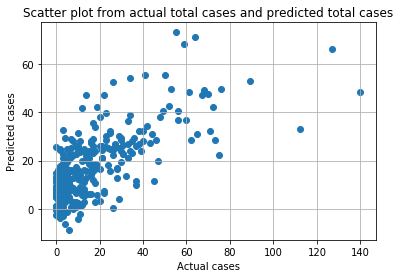

In [16]:
y_pred = sgd_reg.predict(X_test)
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel('Actual cases')
plt.ylabel('Predicted cases')
plt.title('Scatter plot from actual total cases and predicted total cases')
plt.show()

To evaluate the model I have chose below metrics:
<br>
We prefer RMSE as the measure for a regression as the RMSE value gives us an idea of how much error the model makes in its predictions.


In [17]:
# Metrics
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))
print('Mean Aboslute Error :',mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error ',sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error : 231.35601622203635
Mean Aboslute Error : 10.544455990454482
Root Mean Squared Error  15.210391718231202


In [18]:
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[14.6979133]
[  4.36462805  -0.79338011   0.61542921   0.73417626  -0.14021846
   0.5703428    5.94216426  -5.12155314  -6.77111727  -1.38481348
  -3.48682165  -0.47838024  -8.26055223   0.5703428   16.7461438
  -5.760966    -3.7173396    3.13606033  -1.74695155   1.70483948
  -0.6847565   11.52915594   2.75936163  -2.70041949  22.47572355
  18.39710887   0.12749497  19.00044635  -0.44369099  -7.32716847
   3.89542051  37.24359848   3.80185039 -15.55921613  -4.54346747
  -9.78850317  -9.63281014  -6.91944896  -4.89718202 -11.59950923
   0.49229828  -1.7165562   -9.76897833  -6.24847325]


#### Learning curve and insights

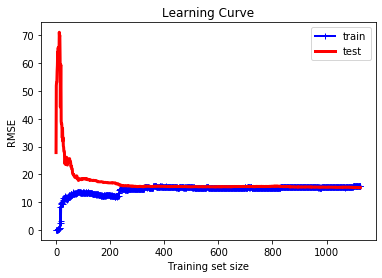

In [19]:
train_errors = []
test_errors = []
for m in range(1, len(X_train)):
    sgd_reg = SGDRegressor(max_iter=600,eta0 = 0.01,learning_rate = 'adaptive')
    sgd_reg.fit(X_train[:m],y_train[:m])
    y_train_pred = sgd_reg.predict(X_train[:m])
    y_test_pred = sgd_reg.predict(X_test)
    train_errors.append(mean_squared_error(y_train_pred, y_train[:m]))
    test_errors.append(mean_squared_error(y_test_pred, y_test))

plt.plot(np.sqrt(train_errors),"b-+",linewidth=2, label="train")
plt.plot(np.sqrt(test_errors), "r-", linewidth=3, label="test")
plt.title('Learning Curve')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()

- In the plot above the training curve starts at 0 which specifies that When there are one or two instances in the training set the model can fit them perfectly. But when new instances are added to training set, it is impossible for the model to fit the data perfectly. The error on the training data goes up to some extent(plateau). At this point adding new instances to the training data doesn't make the error better or worse.
- As the model was trained only with few instances and it is incapable of generalizing properly. So test data starts with high error and goes down slowly. The error ends up at plateau close to the training curve.

In [20]:
dengue_features = pd.read_csv('dengue_features_test.csv')
dengue_features = (dengue_features.fillna(method='ffill'))

In [21]:
dengue_features.shape

(416, 24)

In [22]:
dengue_features['city'] = dengue_features['city'].astype('category')
dengue_features['year'] = dengue_features['year'].astype('category')
df_dummies = pd.get_dummies(dengue_features[['city','year']])
df_dummies = dengue_features.reindex(columns = X_dummies_tr.columns, fill_value=0)

In [23]:
st_pred_data = scaler.transform(dengue_features.drop(columns =['city', 'year','week_start_date']))
test_data = np.concatenate((st_pred_data, df_dummies), axis =1)

In [24]:
predictions = sgd_reg.predict(test_data)

In [25]:
predictions = predictions.astype("int64")
predictions

array([14, 16, 16, 14, 16, 19, 22, 21, 21, 24, 25, 23, 25, 22, 27, 25, 25,
       29, 28, 30, 30, 29, 29, 29, 27, 30, 27, 30, 30, 29, 28, 31, 30, 26,
       28, 10, 15, 12,  8, 10, 10, 11, 11, 12, 14,  7, 11, 11, 12, 12, 14,
       13, 14, 13, 14, 15, 22, 18, 19, 21, 21, 22, 22, 23, 22, 23, 24, 27,
       27, 26, 23, 25, 23, 27, 29, 29, 27, 29, 28, 27, 30, 30, 30, 32, 31,
       29, 29, 29,  8, 10,  7, 14, 15, 12,  9, 10, 10, 10, 11, 17, 18, 14,
       16, 13, 17, 15, 19, 19, 20, 25, 24, 27, 24, 27, 25, 25, 23, 27, 27,
       25, 28, 29, 28, 27, 32, 28, 32, 32, 33, 32, 30, 28, 29, 27, 31, 29,
       29, 28, 23, 27, 10, 10, 14, 13, 12, 12, 12, 13, 14, 13, 14, 14, 13,
       12, 13, 15, 12, 16, 16, 10, 17, 24, 22, 21, 24, 23, 26, 24, 26, 27,
       26, 27, 27, 29, 30, 28, 28, 34, 33, 31, 30, 31, 29, 30, 31, 33, 29,
       28, 27, 32, 26, 27, 12, 13, 12, 10, 11, 13,  9, 12, 10, 13, 14, 14,
       10, 13, 12, 14, 13, 13, 16, 19, 18, 19, 19, 20, 20, 18, 21, 22, 22,
       24, 23, 24, 24, 25

In [26]:
submission = dengue_features[['city','year','weekofyear']]
submission['total_cases'] = predictions
submission.to_csv("submission_Harika.csv",index=False)

In [27]:
submission['total_cases'] = submission['total_cases'].astype('int64')

In [28]:
submission.dtypes

city           category
year           category
weekofyear        int64
total_cases       int64
dtype: object

In [29]:
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))
print('Mean Aboslute Error :',mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error ',sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error : 231.35601622203635
Mean Aboslute Error : 10.544455990454482
Root Mean Squared Error  15.210391718231202
